In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import pandas as pd
import chardet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from nltk.corpus import stopwords
import seaborn as sb
import matplotlib.patches as mpatches
import random
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from networkx.algorithms import bipartite


In [2]:
df = pd.read_csv('Food.csv')

In [3]:
df.head(1)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [4]:
df.shape

(568454, 8)

In [5]:
stop = stopwords.words('english')


In [6]:
df['text_without_stopwords'] = df['review/text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]).lower())

In [7]:
df.head(1)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_without_stopwords
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...


In [8]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
#     sentiment = model(text)[0]['label']
#     print(text)
    res = analyzer.polarity_scores(str(text))
    return [res['pos'], res['neu'], res['neg']]

In [9]:
store = df['text_without_stopwords'].apply(get_sentiment)

In [49]:
store.values

array([list([0.444, 0.556, 0.0]), list([0.106, 0.801, 0.092]),
       list([0.228, 0.634, 0.139]), ..., list([0.0, 1.0, 0.0]),
       list([0.0, 1.0, 0.0]), list([0.0, 1.0, 0.0])], dtype=object)

In [10]:
pos = [x[0] for x in store]
neu = [x[1] for x in store]
neg = [x[2] for x in store]


In [11]:
df['pos'] = pos
df['neu'] = neu
df['neg'] = neg

In [12]:
df.head(2)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_without_stopwords,pos,neu,neg
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,0.444,0.556,0.000
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts.....,0.106,0.801,0.092


In [13]:
helpfulness = []
for index, row in df.iterrows():
    helpfulness.append(int(row['review/helpfulness'][0]))

In [14]:
df['helpfulness'] = helpfulness

In [15]:
df.head(1)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_without_stopwords,pos,neu,neg,helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,0.444,0.556,0.0,1


In [16]:
df['review/time'] = pd.to_datetime(df['review/time'],unit='s')

In [17]:
df['review/score'] = df['review/score'].astype(int)

In [18]:
df.head(1)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_without_stopwords,pos,neu,neg,helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,0.444,0.556,0.0,1


In [19]:
for index, row in df.iterrows():
    print(row)
    break

product/productId                                                B001E4KFG0
review/userId                                                A3SGXH7AUHU8GW
review/profileName                                               delmartian
review/helpfulness                                                      1/1
review/score                                                              5
review/time                                             2011-04-27 00:00:00
review/summary                                        Good Quality Dog Food
review/text               I have bought several of the Vitality canned d...
text_without_stopwords    i bought several vitality canned dog food prod...
pos                                                                   0.444
neu                                                                   0.556
neg                                                                     0.0
helpfulness                                                               1
Name: 0, dty

C:\Users\Jignasu\AppData\Local\Temp\ipykernel_15704\3694307617.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


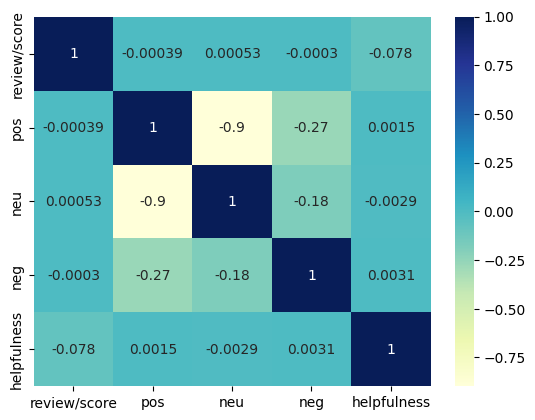

In [84]:
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Bipartite network

In [85]:
BiPartite = nx.Graph()


In [87]:
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)  # Add product node with bipartite attribute set to 0
    BiPartite.add_node(row['review/profileName'], bipartite=1)  # Add user node with bipartite attribute set to 1
    BiPartite.add_edge(row['product/productId'], row['review/profileName'])  # Add edge between product and user nodes

In [125]:
# Extract nodes from a particular partition
product_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 0]
user_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]

selected_userIDs = random.sample(user_nodes, 30)  # Choose 2 userIDs randomly
subsampled_graph = nx.Graph()
for user in selected_userIDs:
    subsampled_graph.add_node(user, bipartite=0)
    for product in BiPartite.neighbors(user):
        subsampled_graph.add_node(product, bipartite=1)
        subsampled_graph.add_edge(user, product)
        
# Define node colors based on their type
colors = []
for node, data in subsampled_graph.nodes(data=True):
    if data['bipartite'] == 0:
        colors.append('red')  # userIDs
    else:
        colors.append('blue')  # productIDs

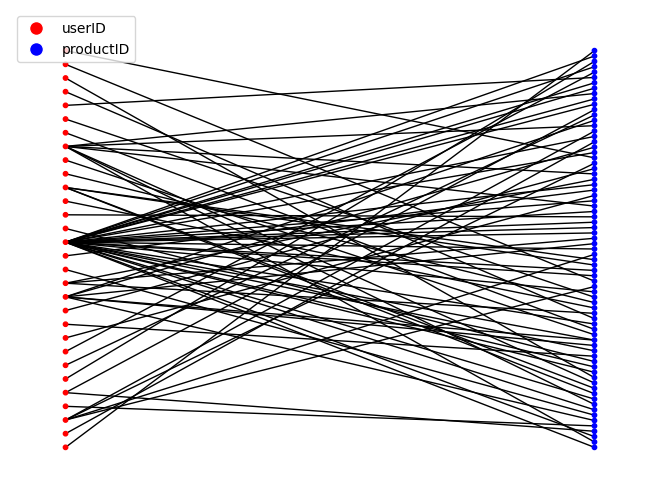

<Figure size 10000x10000 with 0 Axes>

In [132]:
pos = nx.bipartite_layout(subsampled_graph, nodes=[n for n, d in subsampled_graph.nodes(data=True) if d['bipartite'] == 0])
nx.draw(subsampled_graph, pos, with_labels=False, node_size=10, node_color=colors)


legend_elements = [Line2D([0], [0], marker='o', color='w', label='userID', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='productID', markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements, loc='upper left')
plt.figure(figsize=(100,100))
plt.show()

In [133]:
selected_userIDs = random.sample(user_nodes, 100)  # Choose 2 userIDs randomly
subsampled_graph = nx.Graph()
for user in selected_userIDs:
    subsampled_graph.add_node(user, bipartite=0)
    for product in BiPartite.neighbors(user):
        subsampled_graph.add_node(product, bipartite=1)
        subsampled_graph.add_edge(user, product)
        
# Define node colors based on their type
colors = []
for node, data in subsampled_graph.nodes(data=True):
    if data['bipartite'] == 0:
        colors.append('red')  # userIDs
    else:
        colors.append('blue')  # productIDs

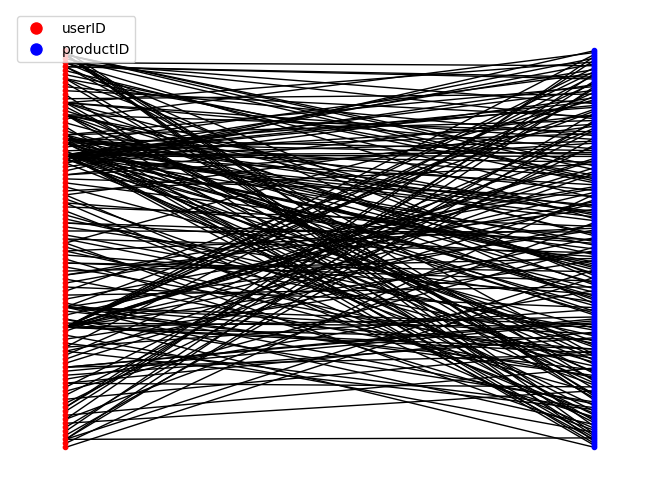

<Figure size 10000x10000 with 0 Axes>

In [134]:
pos = nx.bipartite_layout(subsampled_graph, nodes=[n for n, d in subsampled_graph.nodes(data=True) if d['bipartite'] == 0])
nx.draw(subsampled_graph, pos, with_labels=False, node_size=10, node_color=colors)


legend_elements = [Line2D([0], [0], marker='o', color='w', label='userID', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='productID', markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements, loc='upper left')
plt.figure(figsize=(100,100))
plt.show()

# Weighted edges(Helpfulness)

In [138]:
BiPartite = nx.Graph()

In [140]:
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)  # Add source node with bipartite attribute set to 0
    BiPartite.add_node(row['review/profileName'], bipartite=1)  # Add target node with bipartite attribute set to 1
    BiPartite.add_edge(row['product/productId'], row['review/profileName'], weight=row['helpfulness'])  # Add edge with weight

In [162]:
# Select a random sample of source nodes
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 10  # Adjust the sample size as needed
sampled_source_nodes = random.sample(source_nodes, sample_size)

# Create a subgraph containing the sampled source nodes and their associated target nodes
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

In [167]:
# Calculate edge widths based on weights
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(edge_weights)
min_width = 0.1  # Minimum edge width
max_width = 5  # Maximum edge width
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

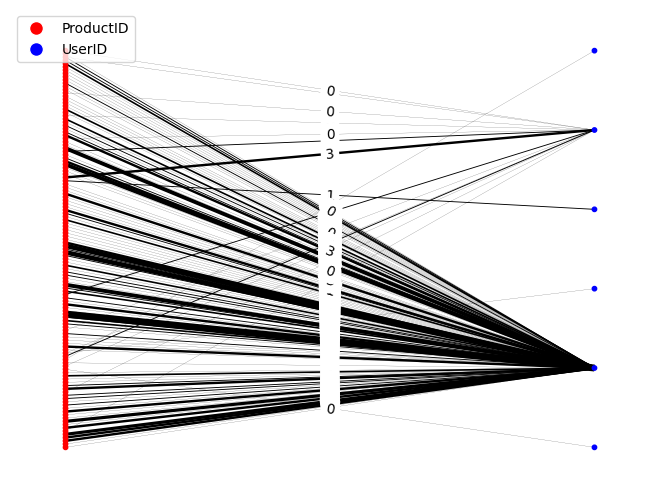

In [168]:
# Plot the sampled bipartite graph with varying edge widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', width=edge_widths)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements, loc='upper left')
plt.show()

# Weighted Graph(Helpfulness * review_score)

In [172]:
BiPartite = nx.Graph()

In [173]:
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)  # Add source node with bipartite attribute set to 0
    BiPartite.add_node(row['review/profileName'], bipartite=1)  # Add target node with bipartite attribute set to 1
    BiPartite.add_edge(row['product/productId'], row['review/profileName'], weight=row['helpfulness']*row['review/score'])  # Add edge with weight

In [174]:
# Select a random sample of source nodes
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 10  # Adjust the sample size as needed
sampled_source_nodes = random.sample(source_nodes, sample_size)

# Create a subgraph containing the sampled source nodes and their associated target nodes
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

In [175]:
# Calculate edge widths based on weights
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(edge_weights)
min_width = 0.1  # Minimum edge width
max_width = 5  # Maximum edge width
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

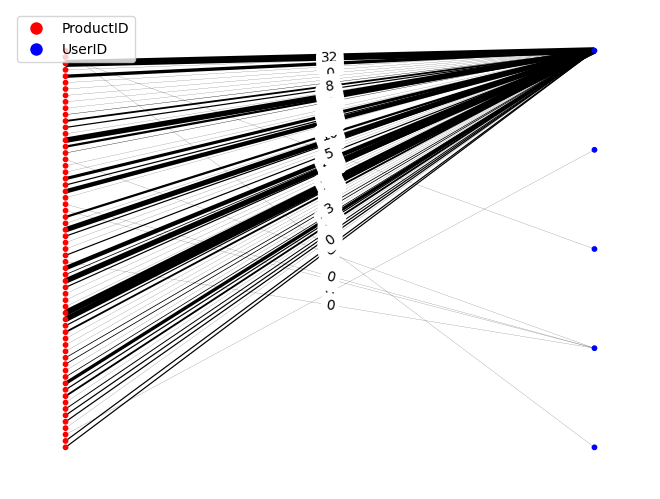

In [176]:
# Plot the sampled bipartite graph with varying edge widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', width=edge_widths)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements, loc='upper left')
plt.show()

# Finding:
##### 1.  People with most numbers of reviews get more positive-helpfulness score, compared to people who review less.

# Weighted by Score

In [178]:
BiPartite = nx.Graph()

In [179]:
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)  # Add source node with bipartite attribute set to 0
    BiPartite.add_node(row['review/profileName'], bipartite=1)  # Add target node with bipartite attribute set to 1
    BiPartite.add_edge(row['product/productId'], row['review/profileName'], weight=row['review/score'])  # Add edge with weight

In [180]:
# Select a random sample of source nodes
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 10  # Adjust the sample size as needed
sampled_source_nodes = random.sample(source_nodes, sample_size)

# Create a subgraph containing the sampled source nodes and their associated target nodes
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

In [181]:
# Calculate edge widths based on weights
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(edge_weights)
min_width = 0.1  # Minimum edge width
max_width = 5  # Maximum edge width
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

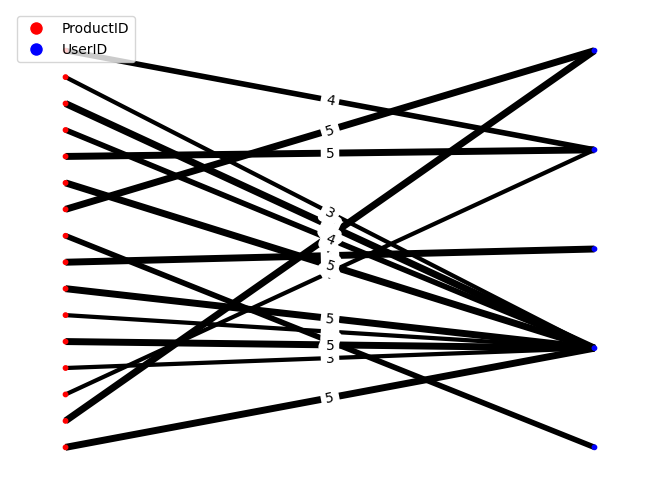

In [182]:
# Plot the sampled bipartite graph with varying edge widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', width=edge_widths)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements, loc='upper left')
plt.show()

# Weighted and color coded by helpfulness and rating respectively

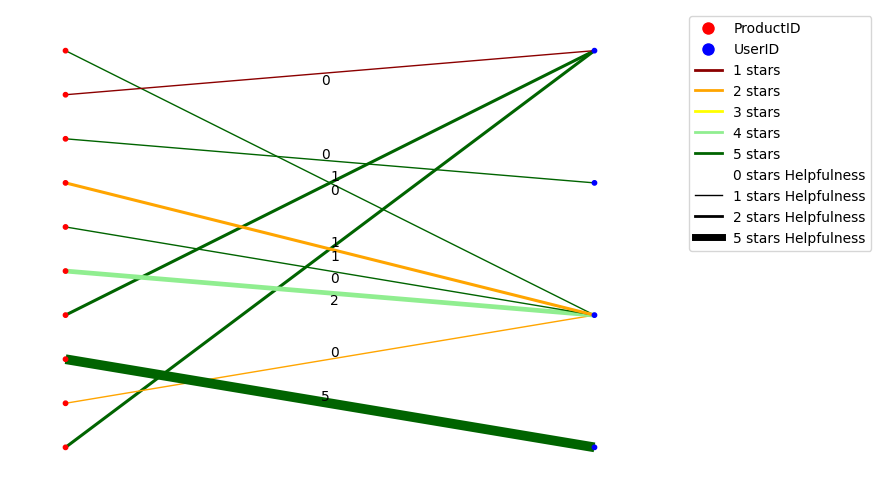

In [192]:
# Create the bipartite graph with edge attributes for weight and rating
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/profileName'], bipartite=1)
    BiPartite.add_edge(row['product/productId'], row['review/profileName'],
                       weight=row['helpfulness'], rating=row['review/score'])

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 10
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Custom color map for star-rating
rating_colors = {1: 'darkred', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Calculate edge colors and widths based on rating and helpfulness score
edge_colors = [rating_colors[Sampled_BiPartite[u][v]['rating']] for u, v in Sampled_BiPartite.edges()]
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights),1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Custom legend elements for edge colors (star-rating)
rating_legend_elements = [Line2D([0], [0], color=rating_colors[r], lw=2, label=f'{r} stars') for r in sorted(rating_colors.keys())]

# Custom legend elements for edge widths (helpfulness scores)
edges_weight_list = sorted(list(set(edge_weights)))  # Get unique edge weights
width_legend_elements = [Line2D([], [], linewidth=w, color='black', label=f'{w} stars Helpfulness') for w in edges_weight_list]


# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
# Add annotations to the edges
for u, v in Sampled_BiPartite.edges():
    x, y = pos[u]
    dx, dy = pos[v][0] - x, pos[v][1] - y
    alignment = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
    if dx < 0:
        alignment['horizontalalignment'] = 'right'
    else:
        alignment['horizontalalignment'] = 'left'
    if dy < 0:
        alignment['verticalalignment'] = 'top'
    else:
        alignment['verticalalignment'] = 'bottom'
    plt.annotate(Sampled_BiPartite[u][v]['weight'], xy=(x + dx / 2, y + dy / 2), xytext=(0, 0), textcoords='offset points', **alignment)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Combine all legend elements and display the legend
legend_elements = node_legend_elements + rating_legend_elements + width_legend_elements


plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))
plt.show()

# Weighted and color coded by helpfulness and rating respectively
# Taking random sampling by products

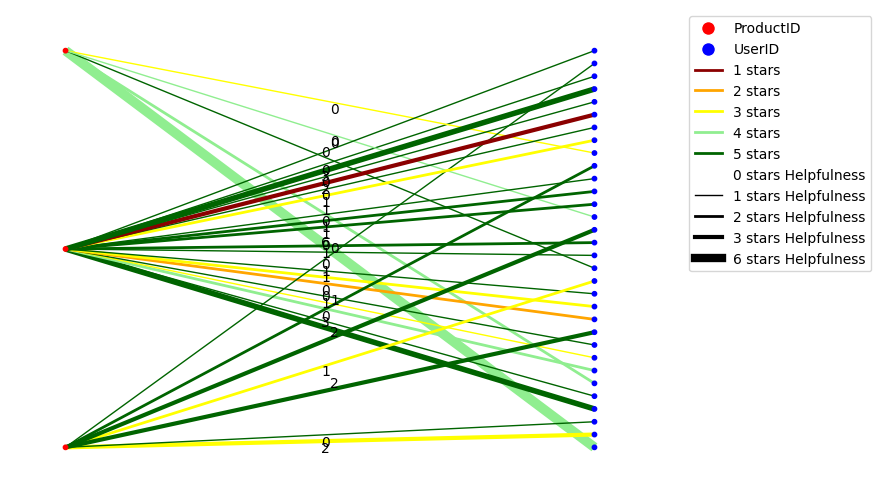

In [191]:
# Create the bipartite graph with edge attributes for weight and rating
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/profileName'], bipartite=1)
    BiPartite.add_edge(row['product/productId'], row['review/profileName'],
                       weight=row['helpfulness'], rating=row['review/score'])

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 0]
sample_size = 10
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Custom color map for star-rating
rating_colors = {1: 'darkred', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Calculate edge colors and widths based on rating and helpfulness score
edge_colors = [rating_colors[Sampled_BiPartite[u][v]['rating']] for u, v in Sampled_BiPartite.edges()]
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights),1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Custom legend elements for edge colors (star-rating)
rating_legend_elements = [Line2D([0], [0], color=rating_colors[r], lw=2, label=f'{r} stars') for r in sorted(rating_colors.keys())]

# Custom legend elements for edge widths (helpfulness scores)
edges_weight_list = sorted(list(set(edge_weights)))  # Get unique edge weights
width_legend_elements = [Line2D([], [], linewidth=w, color='black', label=f'{w} stars Helpfulness') for w in edges_weight_list]


# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
# Add annotations to the edges
for u, v in Sampled_BiPartite.edges():
    x, y = pos[u]
    dx, dy = pos[v][0] - x, pos[v][1] - y
    alignment = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
    if dx < 0:
        alignment['horizontalalignment'] = 'right'
    else:
        alignment['horizontalalignment'] = 'left'
    if dy < 0:
        alignment['verticalalignment'] = 'top'
    else:
        alignment['verticalalignment'] = 'bottom'
    plt.annotate(Sampled_BiPartite[u][v]['weight'], xy=(x + dx / 2, y + dy / 2), xytext=(0, 0), textcoords='offset points', **alignment)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Combine all legend elements and display the legend
legend_elements = node_legend_elements + rating_legend_elements + width_legend_elements


plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))
plt.show()

### Finding
###### We can see the products recieve combined reviews ranging from 5 - 1 and rating which is not the main factor affecting helpfulness as people found various kinds of rating helpful, but it shows that different people look for different things in the comment and find different things helpful

# Product: Sentiment analysis in the color of the edges

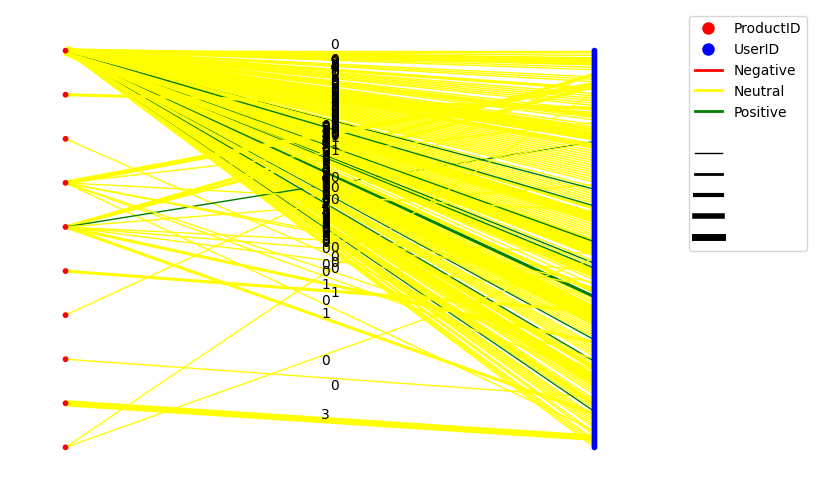

In [200]:
# Create the bipartite graph with edge attributes for weight, sentiment scores, and sentiment category
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/userId'], bipartite=1)
    sentiment_category = 'neutral'
    if row['pos'] > row['neg'] and row['pos'] > row['neu']:
        sentiment_category = 'positive'
    elif row['neg'] > row['pos'] and row['neg'] > row['neu']:
        sentiment_category = 'negative'
    BiPartite.add_edge(row['product/productId'], row['review/userId'],
                       weight=row['helpfulness'], sentiment=sentiment_category)

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 0]
sample_size = 13
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Custom color map for sentiment categories
sentiment_colors = {'positive': 'green', 'neutral': 'yellow', 'negative': 'red'}

# Calculate edge colors and widths based on sentiment category and helpfulness score
edge_colors = [sentiment_colors[Sampled_BiPartite[u][v]['sentiment']] for u, v in Sampled_BiPartite.edges()]
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights), 1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Custom legend elements for edge colors (sentiment categories)
sentiment_legend_elements = [Line2D([0], [0], color=sentiment_colors[s], lw=2, label=s.capitalize()) for s in sorted(sentiment_colors.keys())]

# Custom legend elements for edge widths (helpfulness scores)
edges_weight_list = sorted(list(set(edge_weights)))  # Get unique edge weights
width_legend_elements = [Line2D([], [], linewidth=w, color='black') for w in edges_weight_list]

# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
for u, v in Sampled_BiPartite.edges():
    x, y = pos[u]
    dx, dy = pos[v][0] - x, pos[v][1] - y
    alignment = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
    if dx < 0:
        alignment['horizontalalignment'] = 'right'
    else:
        alignment['horizontalalignment'] = 'left'
    if dy < 0:
        alignment['verticalalignment'] = 'top'
    else:
        alignment['verticalalignment'] = 'bottom'
    plt.annotate(Sampled_BiPartite[u][v]['weight'], xy=(x + dx / 2, y + dy / 2), xytext=(0, 0), textcoords='offset points', **alignment)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Combine all legend elements and display the legend
legend_elements = node_legend_elements + sentiment_legend_elements + width_legend_elements
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))

# Display the plot
plt.show()


# User: Sentiment analysis in the color of the edges

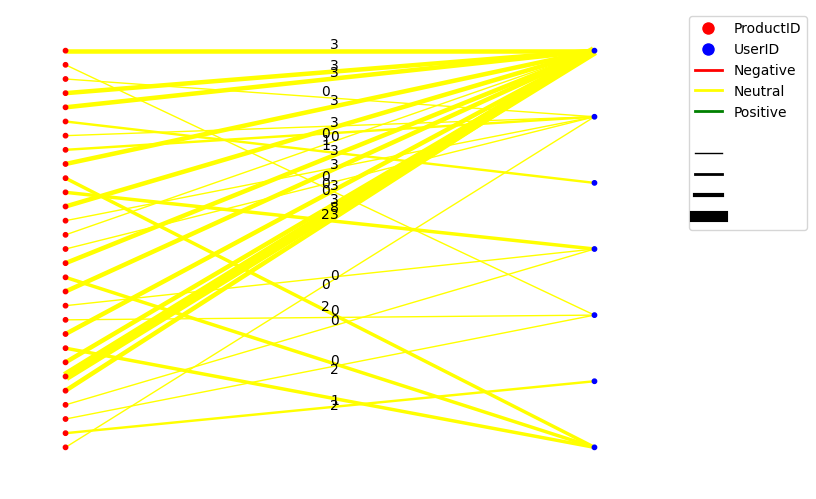

In [201]:
# Create the bipartite graph with edge attributes for weight, sentiment scores, and sentiment category
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/userId'], bipartite=1)
    sentiment_category = 'neutral'
    if row['pos'] > row['neg'] and row['pos'] > row['neu']:
        sentiment_category = 'positive'
    elif row['neg'] > row['pos'] and row['neg'] > row['neu']:
        sentiment_category = 'negative'
    BiPartite.add_edge(row['product/productId'], row['review/userId'],
                       weight=row['helpfulness'], sentiment=sentiment_category)

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 13
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Custom color map for sentiment categories
sentiment_colors = {'positive': 'green', 'neutral': 'yellow', 'negative': 'red'}

# Calculate edge colors and widths based on sentiment category and helpfulness score
edge_colors = [sentiment_colors[Sampled_BiPartite[u][v]['sentiment']] for u, v in Sampled_BiPartite.edges()]
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights), 1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Custom legend elements for edge colors (sentiment categories)
sentiment_legend_elements = [Line2D([0], [0], color=sentiment_colors[s], lw=2, label=s.capitalize()) for s in sorted(sentiment_colors.keys())]

# Custom legend elements for edge widths (helpfulness scores)
edges_weight_list = sorted(list(set(edge_weights)))  # Get unique edge weights
width_legend_elements = [Line2D([], [], linewidth=w, color='black') for w in edges_weight_list]

# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
for u, v in Sampled_BiPartite.edges():
    x, y = pos[u]
    dx, dy = pos[v][0] - x, pos[v][1] - y
    alignment = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
    if dx < 0:
        alignment['horizontalalignment'] = 'right'
    else:
        alignment['horizontalalignment'] = 'left'
    if dy < 0:
        alignment['verticalalignment'] = 'top'
    else:
        alignment['verticalalignment'] = 'bottom'
    plt.annotate(Sampled_BiPartite[u][v]['weight'], xy=(x + dx / 2, y + dy / 2), xytext=(0, 0), textcoords='offset points', **alignment)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Combine all legend elements and display the legend
legend_elements = node_legend_elements + sentiment_legend_elements + width_legend_elements
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))

# Display the plot
plt.show()


# User: Changing sentiment color scheme to gradient

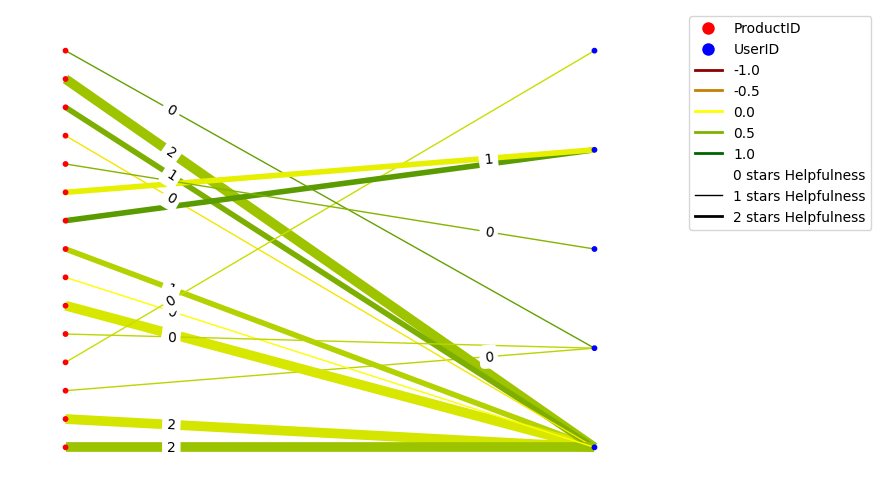

In [206]:
# Create the bipartite graph with edge attributes for weight and sentiment scores
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/userId'], bipartite=1)
    sentiment_score = row['pos'] if row['pos'] >= row['neg'] else -1 * row['neg']
    BiPartite.add_edge(row['product/productId'], row['review/userId'],
                       weight=row['helpfulness'], sentiment_score=sentiment_score)

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 13
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Create a custom color map for sentiment scores
color_map = LinearSegmentedColormap.from_list('sentiment_colors', ['darkred', 'yellow', 'darkgreen'])

# Calculate edge colors based on sentiment scores using the custom color map
sentiment_scores = [Sampled_BiPartite[u][v]['sentiment_score'] for u, v in Sampled_BiPartite.edges()]
normalized_sentiment_scores = [(s + 1) / 2 for s in sentiment_scores]
edge_colors = [color_map(s) for s in normalized_sentiment_scores]

# Calculate edge widths based on helpfulness score
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights), 1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels, label_pos=0.2)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Create a custom legend for sentiment scores (color gradient)
sentiment_legend_elements = [Line2D([0], [0], color=color_map(i / 100), lw=2, label=str(i / 100 * 2 - 1)) for i in range(0, 101, 25)]

# Custom legend elements for edge widths (helpfulness scores)
edges_weight_list = sorted(list(set(edge_weights)))  # Get unique edge weights
width_legend_elements = [Line2D([], [], linewidth=w, color='black', label=f'{w} stars Helpfulness') for w in edges_weight_list]


# Combine all legend elements and display the legend
legend_elements = node_legend_elements + sentiment_legend_elements + width_legend_elements
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))

# Display
plt.show()

# Product: Sentiment analysis color; helfulness width

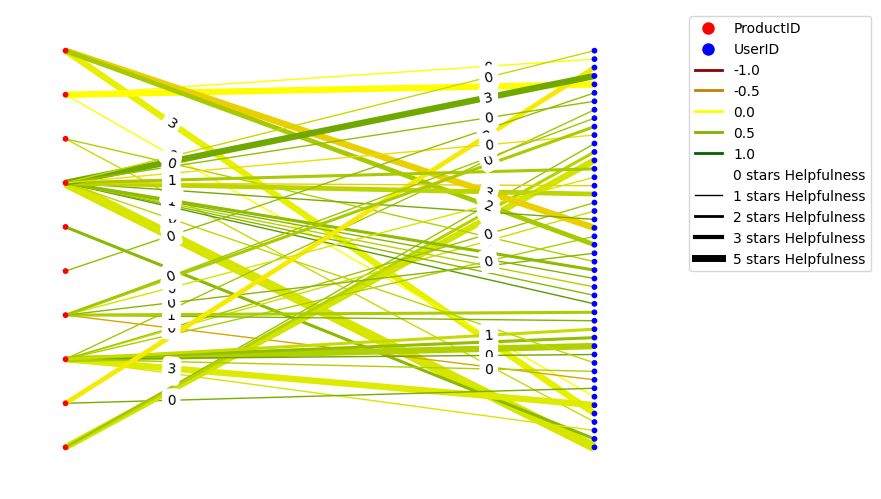

In [207]:
# Create the bipartite graph with edge attributes for weight and sentiment scores
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/userId'], bipartite=1)
    sentiment_score = row['pos'] if row['pos'] >= row['neg'] else -1 * row['neg']
    BiPartite.add_edge(row['product/productId'], row['review/userId'],
                       weight=row['helpfulness'], sentiment_score=sentiment_score)

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 0]
sample_size = 13
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Create a custom color map for sentiment scores
color_map = LinearSegmentedColormap.from_list('sentiment_colors', ['darkred', 'yellow', 'darkgreen'])

# Calculate edge colors based on sentiment scores using the custom color map
sentiment_scores = [Sampled_BiPartite[u][v]['sentiment_score'] for u, v in Sampled_BiPartite.edges()]
normalized_sentiment_scores = [(s + 1) / 2 for s in sentiment_scores]
edge_colors = [color_map(s) for s in normalized_sentiment_scores]

# Calculate edge widths based on helpfulness score
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights), 1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels, label_pos=0.2)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Create a custom legend for sentiment scores (color gradient)
sentiment_legend_elements = [Line2D([0], [0], color=color_map(i / 100), lw=2, label=str(i / 100 * 2 - 1)) for i in range(0, 101, 25)]

# Custom legend elements for edge widths (helpfulness scores)
edges_weight_list = sorted(list(set(edge_weights)))  # Get unique edge weights
width_legend_elements = [Line2D([], [], linewidth=w, color='black', label=f'{w} stars Helpfulness') for w in edges_weight_list]


# Combine all legend elements and display the legend
legend_elements = node_legend_elements + sentiment_legend_elements + width_legend_elements
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))

# Display
plt.show()

# User: Color: sentiment, width: helpfulness

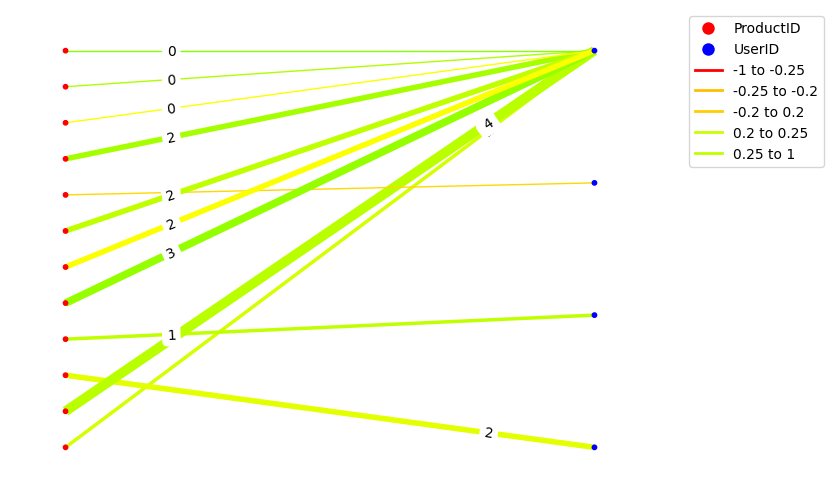

In [208]:
# Define the color map for the sentiment scores
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]
cmap_name = 'sentiment_colors'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Define the bounds for the color map
bounds = [-1, -0.25, -0.2, 0.2, 0.25, 1]
norm = plt.Normalize(min(bounds), max(bounds))

# Create the bipartite graph with edge attributes for weight and sentiment scores
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/userId'], bipartite=1)
    
    # Sentiment score formula
    sentiment_score = row['pos'] if row['pos'] >= row['neg'] else -1 * row['neg']
    
    BiPartite.add_edge(row['product/productId'], row['review/userId'],
                       weight=row['helpfulness'], sentiment_score=sentiment_score)

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1]
sample_size = 10
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Calculate edge colors based on sentiment scores using the custom color map
sentiment_scores = [Sampled_BiPartite[u][v]['sentiment_score'] for u, v in Sampled_BiPartite.edges()]
edge_colors = [cm(norm(score)) for score in sentiment_scores]

# Calculate edge widths based on helpfulness score
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights), 1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels, label_pos=0.2)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Create a custom legend for sentiment scores (color gradient)
sentiment_legend_elements = [Line2D([0], [0], color=cm(norm(bounds[i])), lw=2, label=str(bounds[i]) + ' to ' + str(bounds[i+1])) for i in range(len(bounds) - 1)]

# Combine all legend elements and display the legend
legend_elements = node_legend_elements + sentiment_legend_elements
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))

# Display the plot
plt.show()


# Product: Color: sentiment, width: helpfulness

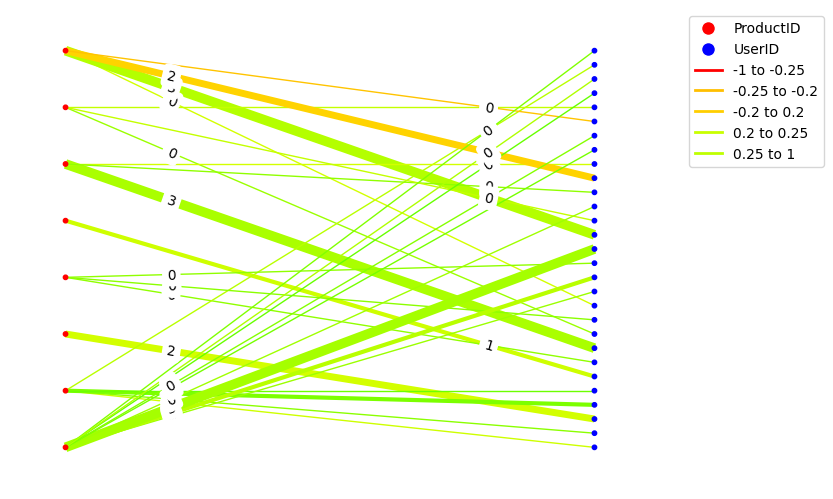

In [209]:
# Define the color map for the sentiment scores
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]
cmap_name = 'sentiment_colors'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Define the bounds for the color map
bounds = [-1, -0.25, -0.2, 0.2, 0.25, 1]
norm = plt.Normalize(min(bounds), max(bounds))

# Create the bipartite graph with edge attributes for weight and sentiment scores
BiPartite = nx.Graph()
for index, row in df.iterrows():
    BiPartite.add_node(row['product/productId'], bipartite=0)
    BiPartite.add_node(row['review/userId'], bipartite=1)
    
    # Sentiment score formula
    sentiment_score = row['pos'] if row['pos'] >= row['neg'] else -1 * row['neg']
    
    BiPartite.add_edge(row['product/productId'], row['review/userId'],
                       weight=row['helpfulness'], sentiment_score=sentiment_score)

# Sample the source nodes and create a subgraph
source_nodes = [n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 0]
sample_size = 12
sampled_source_nodes = random.sample(source_nodes, sample_size)
sampled_edges = [(u, v) for u, v in BiPartite.edges if u in sampled_source_nodes]
sampled_nodes = set([u for u, v in sampled_edges] + [v for u, v in sampled_edges])
Sampled_BiPartite = BiPartite.subgraph(sampled_nodes)

# Calculate edge colors based on sentiment scores using the custom color map
sentiment_scores = [Sampled_BiPartite[u][v]['sentiment_score'] for u, v in Sampled_BiPartite.edges()]
edge_colors = [cm(norm(score)) for score in sentiment_scores]

# Calculate edge widths based on helpfulness score
edge_weights = [Sampled_BiPartite[u][v]['weight'] for u, v in Sampled_BiPartite.edges()]
max_weight = max(max(edge_weights), 1)
min_width = 1
max_width = 7
edge_widths = [((w / max_weight) * (max_width - min_width)) + min_width for w in edge_weights]

# Plot the sampled bipartite graph with varying edge colors and widths
colors = ['red' if data['bipartite'] == 0 else 'blue' for _, data in Sampled_BiPartite.nodes(data=True)]
pos = nx.bipartite_layout(Sampled_BiPartite, [n for n, d in Sampled_BiPartite.nodes(data=True) if d['bipartite'] == 0])
nx.draw(Sampled_BiPartite, pos, node_color=colors, with_labels=False, node_size=10, font_size=5, font_weight='bold', edge_color=edge_colors, width=edge_widths)

# Draw edge labels (helpfulness scores)
edge_labels = nx.get_edge_attributes(Sampled_BiPartite, 'weight')
nx.draw_networkx_edge_labels(Sampled_BiPartite, pos, edge_labels=edge_labels, label_pos=0.2)

# Create a custom legend for nodes
node_legend_elements = [Line2D([0], [0], marker='o', color='w', label='ProductID', markerfacecolor='red', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='UserID', markerfacecolor='blue', markersize=10)]

# Create a custom legend for sentiment scores (color gradient)
sentiment_legend_elements = [Line2D([0], [0], color=cm(norm(bounds[i])), lw=2, label=str(bounds[i]) + ' to ' + str(bounds[i+1])) for i in range(len(bounds) - 1)]

# Combine all legend elements and display the legend
legend_elements = node_legend_elements + sentiment_legend_elements
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0))

# Display the plot
plt.show()


In [20]:
df['sentiment_score'] = df.apply(lambda row: row['pos'] if row['pos'] > row['neg'] else -1 * row['neg'], axis=1)


In [24]:
df.head(1)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_without_stopwords,pos,neu,neg,helpfulness,sentiment_score
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,0.444,0.556,0.0,1,0.444


In [25]:
def get_color(sentiment_score):
    if sentiment_score > 0.1:
        return 'bright green'
    elif sentiment_score < -0.1:
        return 'bright red'
    else:
        return 'bright yellow'

df['color'] = df['sentiment_score'].apply(get_color)

C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabt

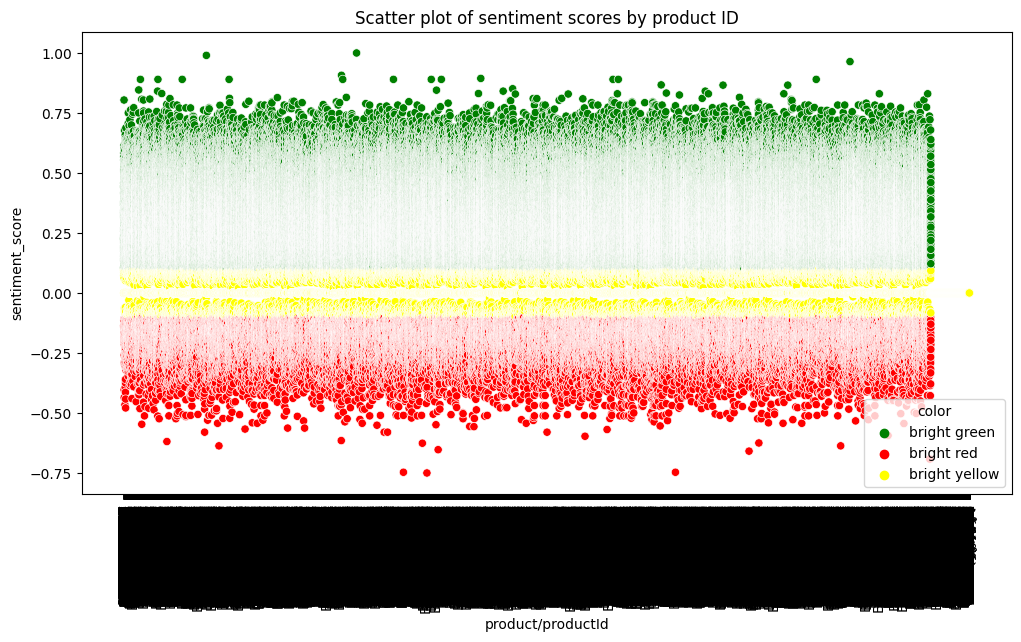

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='product/productId', y='sentiment_score', hue='color', palette=['green', 'red', 'yellow'])
plt.xticks(rotation=90)
plt.title('Scatter plot of sentiment scores by product ID')
plt.show()

C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python310\lib\site-packages\IPython\core\pylabt

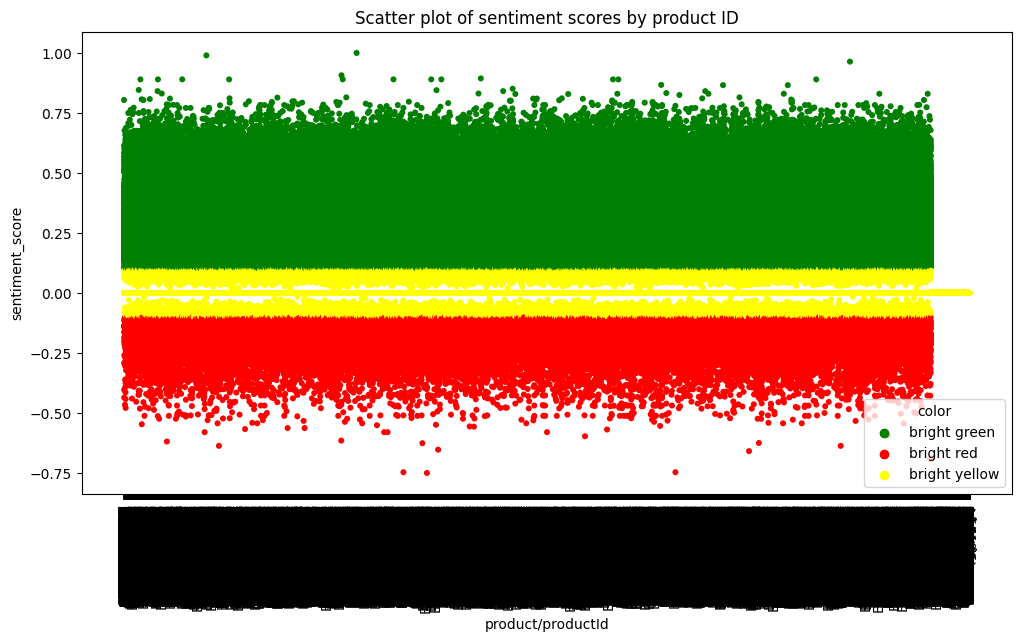

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='product/productId', y='sentiment_score', hue='color', palette=['green', 'red', 'yellow'], edgecolor='none', s=75*0.25)
plt.xticks(rotation=90)
plt.title('Scatter plot of sentiment scores by product ID')
plt.show()

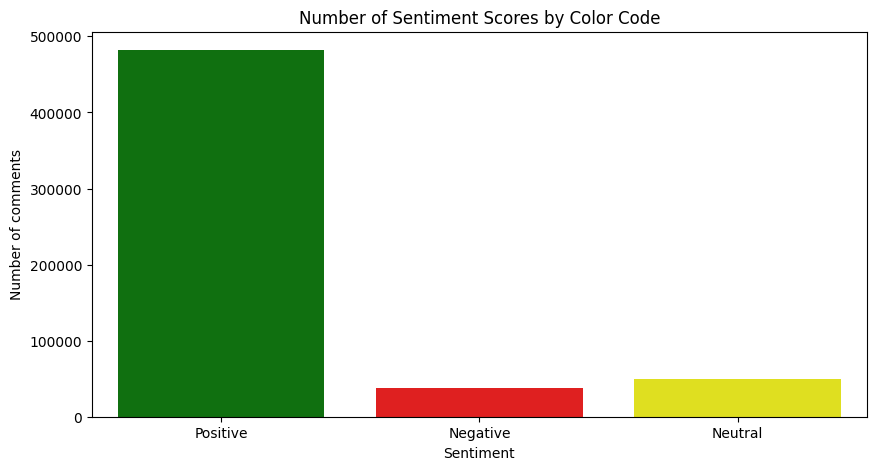

In [31]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='color', palette=['green', 'red', 'yellow'])

# Custom x-axis labels
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])

plt.xlabel("Sentiment")
plt.ylabel("Number of comments")
plt.title("Number of Sentiment Scores by Color Code")
plt.show()

# Degree centrality and betweenness centrality

In [54]:
BiPartite = nx.Graph()
BiPartite.add_nodes_from(df['product/productId'].unique(), bipartite=0)
BiPartite.add_nodes_from(df['review/userId'].unique(), bipartite=1)
BiPartite.add_edges_from([(row['review/userId'], row['product/productId']) for idx, row in df.iterrows()])

edges = list(BiPartite.edges())
num_edges_to_remove = int(len(edges) * 0.5)
edges_to_remove = random.sample(edges, num_edges_to_remove)

BiPartite.remove_edges_from(edges_to_remove)

nodes_to_remove = [n for n, d in BiPartite.degree() if d == 0]
BiPartite.remove_nodes_from(nodes_to_remove)


# Project the bipartite graph onto users
user_nodes = {n for n, d in BiPartite.nodes(data=True) if d['bipartite'] == 1}
G = bipartite.projected_graph(BiPartite, user_nodes)
print("_1")
# Calculate degree centrality and betweenness centrality
degree_centrality = nx.degree_centrality(G)
print("degree Centrality: ", degree_centrality)
k = 100
betweenness_centrality = nx.betweenness_centrality(G, k=k)
print(" Betweenness_centrality: ", betweenness_centrality)

# Add centrality measures to the dataframe
df['degree_centrality'] = df['review/userId'].map(degree_centrality)
df['betweenness_centrality'] = df['review/userId'].map(betweenness_centrality)
print("_2")
# Identify influential users based on the number of reviews and helpfulness scores
df['helpfulness_ratio'] = df['review/helpfulness'].apply(lambda x: int(x.split('/')[0]) / int(x.split('/')[1]) if '/' in x and int(x.split('/')[1]) != 0 else 0)
influential_users = df.sort_values(by=['degree_centrality', 'betweenness_centrality', 'helpfulness_ratio'], ascending=False)

_1
degree Centrality:  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



_2


# Analyzing top influencers

In [55]:
top_influential_users = influential_users.head(10000)


In [56]:
top_influential_users.head(10)

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,text_without_stopwords,pos,neu,neg,helpfulness,sentiment_score,color,degree_centrality,betweenness_centrality,helpfulness_ratio
369,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1/1,5,2010-08-19,Very Smooth Coffee - Highly Recommended,"If you are a peanut lover, these are for you. ...","if peanut lover, you. much larger cocktail pea...",0.342,0.658,0.000,1,0.342,bright green,0.02597,0.02713,1.0
3416,B005K4Q1VI,A3OXHLG6DIBRW8,DR,5/5,5,2011-11-16,Great cocoa,"very good corn product, we will be eating this...","good corn product, eating case corn way faster...",0.397,0.603,0.000,5,0.397,bright green,0.02597,0.02713,1.0
3926,B000VSDFRG,A3OXHLG6DIBRW8,Word Smythe,2/2,5,2009-03-16,"Bit pricy, but really good",ive heard mixed reviews of this.. yeah it feel...,ive heard mixed reviews this.. yeah feels chea...,0.446,0.459,0.095,2,0.446,bright green,0.02597,0.02713,1.0
15819,B007TJGZ5E,A3OXHLG6DIBRW8,S and K Reviews,3/3,5,2010-08-19,Order arrived promptly filled with EMPTY k-cups,SWITCH KIWI BERRY carbonated juice is a pleasa...,switch kiwi berry carbonated juice pleasant su...,0.223,0.687,0.091,3,0.223,bright green,0.02597,0.02713,1.0
18764,B001534R00,A3OXHLG6DIBRW8,regulargurl,1/1,4,2010-06-07,Reminds Me Of Olive Oil,"Okay, it does smell kind of like cat food. But...","okay, smell kind like cat food. but packaged f...",0.534,0.466,0.000,1,0.534,bright green,0.02597,0.02713,1.0
20662,B000MP84MO,A3OXHLG6DIBRW8,"KrisPorterDPT,OCS",2/2,5,2010-09-05,Not worth the $$,I love chocolate so I was excited to see the C...,i love chocolate i excited see chocolate sampl...,0.180,0.774,0.046,2,0.180,bright green,0.02597,0.02713,1.0
23629,B000E1FXLG,A3OXHLG6DIBRW8,Victor Pariso,2/2,5,2009-03-07,Awesome healthIER snack option!,"I love this product, the pound cake is amazing...","i love product, pound cake amazing, tastes gre...",0.240,0.652,0.108,2,0.240,bright green,0.02597,0.02713,1.0
38356,B000FZ0TL0,A3OXHLG6DIBRW8,Gula,2/2,4,2009-04-28,himalayan salt,I have a very finicky cat who won't eat just a...,i finicky cat eat anything developed digestive...,0.237,0.710,0.054,2,0.237,bright green,0.02597,0.02713,1.0
43578,B001EQ4P2I,A3OXHLG6DIBRW8,Barbara C. Shealy,1/1,5,2012-02-19,Love these,The only thing I can think about this drink is...,the thing i think drink something positive bod...,0.228,0.583,0.189,1,0.228,bright green,0.02597,0.02713,1.0
44664,B001EQ55RW,A3OXHLG6DIBRW8,"Ernest Friedman-Hill ""JavaRanch Sheriff""",3/3,4,2012-05-06,A great tasting snack!,HAVE PURCHASED THIS PRODUCT MANY TIMES IN THE ...,have purchased this product many times in the ...,0.227,0.732,0.041,3,0.227,bright green,0.02597,0.02713,1.0


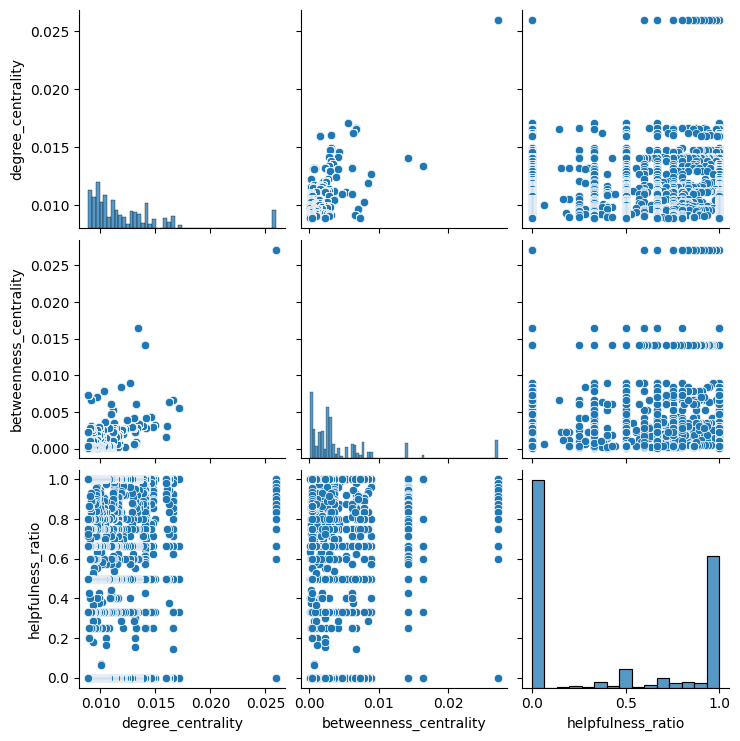

In [57]:
sns.pairplot(top_influential_users, vars=['degree_centrality', 'betweenness_centrality', 'helpfulness_ratio'])


In [58]:
top_influential_users['average_review_score'] = top_influential_users.groupby('review/userId')['review/score'].transform('mean')
top_influential_users['number_of_reviews'] = top_influential_users.groupby('review/userId')['review/score'].transform('count')


C:\Users\Jignasu\AppData\Local\Temp\ipykernel_13264\691152591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_influential_users['average_review_score'] = top_influential_users.groupby('review/userId')['review/score'].transform('mean')
C:\Users\Jignasu\AppData\Local\Temp\ipykernel_13264\691152591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_influential_users['number_of_reviews'] = top_influential_users.groupby('review/userId')['review/score'].transform('count')


<AxesSubplot: >

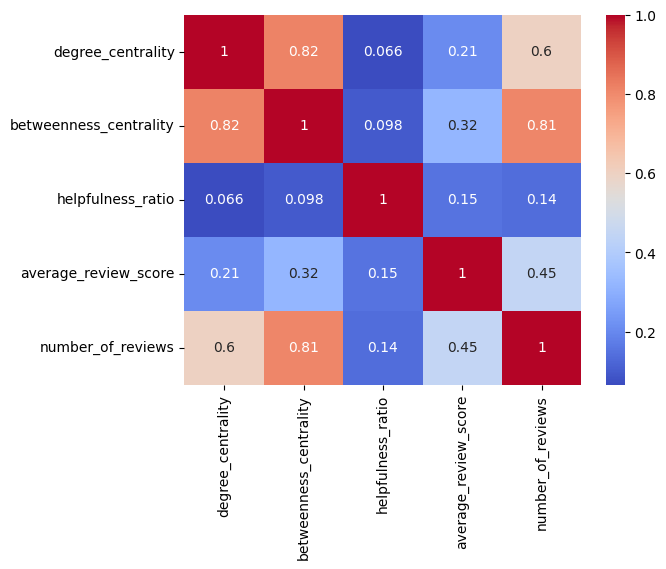

In [59]:
correlation_matrix = top_influential_users[['degree_centrality', 'betweenness_centrality', 'helpfulness_ratio', 'average_review_score', 'number_of_reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
